In [4]:
# 1. Load the dataset into python environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 2. Make ‘PassengerId’ as the index column
df = pd.read_csv('titanic_dataset.csv',index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 3. Check the basic details of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.shape

(891, 11)

In [9]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

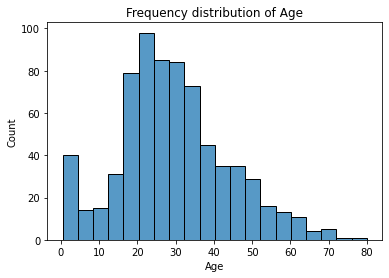

In [12]:
sns.histplot(x='Age',data=df)
plt.title('Frequency distribution of Age')
plt.show()

In [13]:
# 4. Fill in all the missing values present in all the columns in the dataset

# 3 columns has missing values Age,Cabin,Embarked

#first lets fill the column age

df['Age'].median() #to fill the the values of the column age we are taking its median to fill it

28.0

In [14]:
#filling the missing values of the column age

df['Age'] = df['Age'].fillna(df['Age'].median())

In [15]:
df.isna().sum() #to check whether the column age has no missing values now

#so column age has no missing values now 

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [16]:
#now filling  the column Embarked so taking mode here

df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
#here S is repeated more times so filling the column with S
df['Embarked'] = df['Embarked'].fillna('S')
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [17]:
#now the column Cabin

df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [18]:
df['Cabin']= df['Cabin'].fillna('U') #filling it with a value U

In [19]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [20]:
df #all missing values are filled

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,U,S


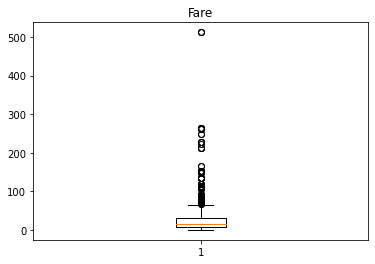

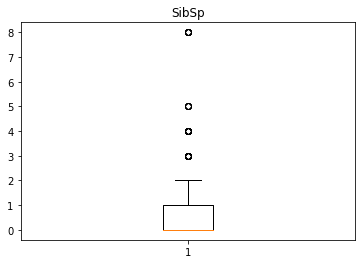

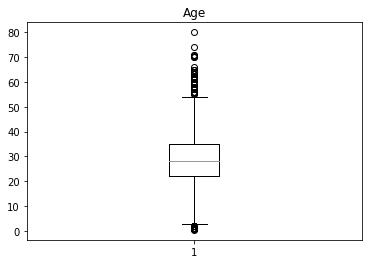

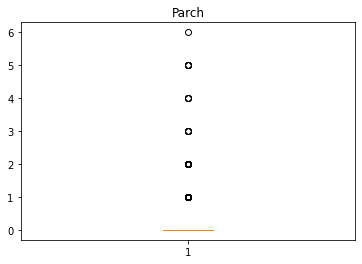

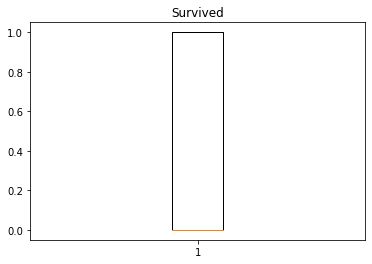

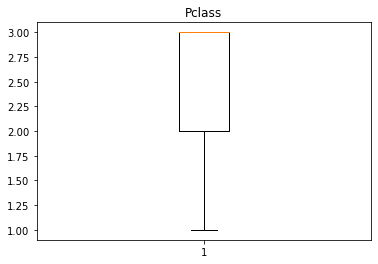

In [25]:
# 5. Check and handle outliers in at least 3 columns in the dataset

columns=['Fare','SibSp','Age','Parch','Survived','Pclass']
for i in columns:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [27]:

# Fare


Q1=np.percentile(df['Fare'],25,method='midpoint')
Q2=np.percentile(df['Fare'],50,method='midpoint')
Q3=np.percentile(df['Fare'],75,method='midpoint')
print("Q1 is :", Q1)
print("Q2 is :", Q2)
print("Q3 is :", Q3)
IQR=Q3-Q1
print('\n' "IQR is : ",IQR)
low=Q1-1.5*IQR
high= Q3+1.5*IQR
print('\n' "The lowest value is :", low)
print("The highest value is :", high)


Q1 is : 7.9104
Q2 is : 14.4542
Q3 is : 31.0

IQR is :  23.0896

The lowest value is : -26.724
The highest value is : 65.6344


In [30]:
outlier=[]
for x in df['Fare']:
    if ((x<low) or (x>high)):
        outlier.append(x)
print(outlier)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [31]:
len(outlier)

116

In [33]:
df['Fare']=df['Fare'].clip(lower=low,upper=high)

In [35]:
outlier=[]
for x in df['Fare']:
    if ((x<low) or (x>high)):
        outlier.append(x)
print(outlier)

[]


In [36]:
#Age  handling outlers in age using z score method

Q1=np.percentile(df['Age'],25,method='midpoint')
Q2=np.percentile(df['Age'],50,method='midpoint')
Q3=np.percentile(df['Age'],75,method='midpoint')
print("Q1 is :", Q1)
print("Q2 is :", Q2)
print("Q3 is :", Q3)
IQR=Q3-Q1
print('\n' "IQR is : ",IQR)
low=Q1-1.5*IQR
high= Q3+1.5*IQR
print('\n' "The lowest value is :", low)
print("The highest value is :", high)


Q1 is : 22.0
Q2 is : 28.0
Q3 is : 35.0

IQR is :  13.0

The lowest value is : 2.5
The highest value is : 54.5


In [37]:
outlier=[]
for x in df['Age']:
    if ((x<low) or (x>high)):
        outlier.append(x)
print(outlier)

[2.0, 58.0, 55.0, 2.0, 66.0, 65.0, 0.83, 59.0, 71.0, 70.5, 2.0, 55.5, 1.0, 61.0, 1.0, 56.0, 1.0, 58.0, 2.0, 59.0, 62.0, 58.0, 63.0, 65.0, 2.0, 0.92, 61.0, 2.0, 60.0, 1.0, 1.0, 64.0, 65.0, 56.0, 0.75, 2.0, 63.0, 58.0, 55.0, 71.0, 2.0, 64.0, 62.0, 62.0, 60.0, 61.0, 57.0, 80.0, 2.0, 0.75, 56.0, 58.0, 70.0, 60.0, 60.0, 70.0, 0.67, 57.0, 1.0, 0.42, 2.0, 1.0, 62.0, 0.83, 74.0, 56.0]


In [38]:
len(outlier)


66

In [39]:
from scipy.stats import zscore
z_score= zscore(df['Age'])
z_score

PassengerId
1     -0.565736
2      0.663861
3     -0.258337
4      0.433312
5      0.433312
         ...   
887   -0.181487
888   -0.796286
889   -0.104637
890   -0.258337
891    0.202762
Name: Age, Length: 891, dtype: float64

In [40]:
threshold=2
outlier_index=df.index[(z_score> threshold)| (z_score< -threshold)]
len(outlier_index)

70

In [41]:
df1=df.drop(outlier_index)
df1


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,U,S


{'whiskers': [<matplotlib.lines.Line2D at 0x2aed4deb070>,
 'caps': [<matplotlib.lines.Line2D at 0x2aed4deb610>,
 'boxes': [<matplotlib.lines.Line2D at 0x2aed4de0d60>],
 'medians': [<matplotlib.lines.Line2D at 0x2aed4debbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2aed4debe80>],
 'means': []}

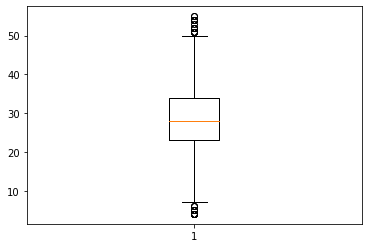

In [42]:
plt.boxplot(df1['Age'])

In [43]:
outlier=[]
for x in df1['Age']:
    if ((x<low) or (x>high)):
        outlier.append(x)
print(outlier)


[55.0, 55.0]


In [44]:
#Parch

Q1=np.percentile(df['Parch'],25,method='midpoint')
Q2=np.percentile(df['Parch'],50,method='midpoint')
Q3=np.percentile(df['Parch'],75,method='midpoint')
print("Q1 is :", Q1)
print("Q2 is :", Q2)
print("Q3 is :", Q3)
IQR=Q3-Q1
print('\n' "IQR is : ",IQR)
low=Q1-1.5*IQR
high= Q3+1.5*IQR
print('\n' "The lowest value is :", low)
print("The highest value is :", high)

Q1 is : 0.0
Q2 is : 0.0
Q3 is : 0.0

IQR is :  0.0

The lowest value is : 0.0
The highest value is : 0.0


In [45]:
outlier=[]
for x in df['Parch']:
    if ((x<low) or (x>high)):
        outlier.append(x)
print(outlier)


[1, 2, 1, 5, 1, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 3, 4, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 1, 2, 1, 2, 1, 1, 2, 5, 2, 1, 1, 1, 2, 1, 5, 2, 1, 1, 1, 2, 1, 6, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 5, 2]


In [46]:
len(outlier)

213

In [47]:
df['Parch']=df['Parch'].clip(lower=low,upper=high)


In [49]:
outlier=[]
for x in df['Parch']:
    if ((x<low) or (x>high)):
        outlier.append(x)
print(outlier)

[]


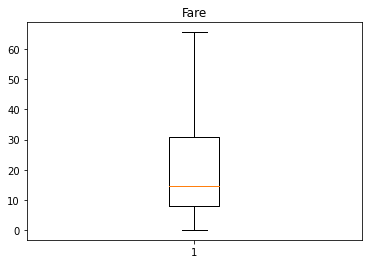

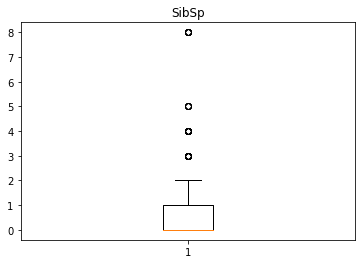

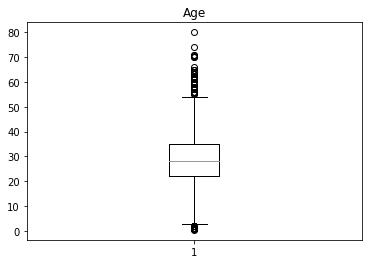

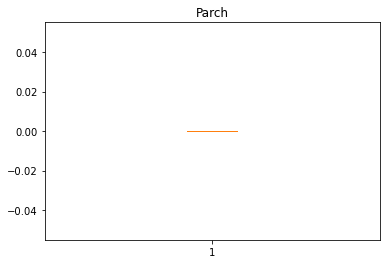

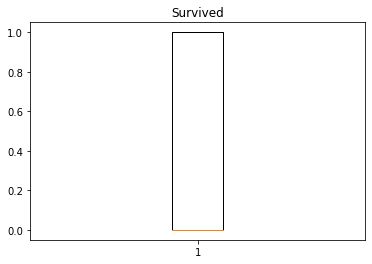

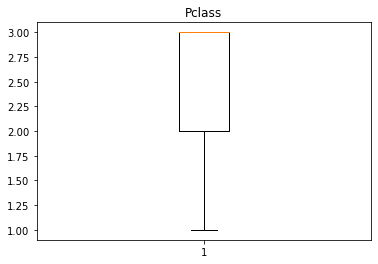

In [51]:
columns=['Fare','SibSp','Age','Parch','Survived','Pclass']
for i in columns:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

In [21]:
# 6. Do min max scaling on the feature set (Take ‘Survived’ as target)



In [20]:
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
X=df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
X_mm=minmax.fit_transform(X)
X_mm=pd.DataFrame(X_mm)

X_mm.describe()

,0,1,2,3,4
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.028213
75%,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000
